In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw03.ipynb")

# Homework 3: Table Manipulation and Visualization

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/fa21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Reading**: 
* [Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due Thursday, 9/16 at 11:59pm PT. Turn it in on Wednesday by 11:59pm PT for 5 extra credit points. Late work will not be accepted as per the [policies](http://data8.org/fa21/policies.html) page.


**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday-Friday. The schedule appears on [http://data8.org/fa21/office-hours.html](http://data8.org/fa21/office-hours.html).

In [3]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Unemployment

The Great Recession of 2008-2009 was a period of economic decline observed globally, with scale and timing varying from country to country. In the U.S., it resulted in a rapid rise in unemployment that affected industries and population groups to different extents.

The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_1
points:
 - 4
-->

In [4]:
unemployment = Table().read_table('unemployment.csv')
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [5]:
try:
    print(grader.check("q1_1"))
except NameError:
    print("Please run the cells at the very top of this notebook, from the top down, then run this cell again.")

q1_1 results: All test cases passed!


**Question 2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_2
points:
 - 2
 - 2
-->

In [6]:
by_nei = unemployment.sort('NEI', descending = True)
by_nei_pter = unemployment.sort("NEI-PTER", descending = True)

In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

In [8]:
# Run this cell to check your by_nei table. You do not need to change the code.
by_nei.show(5)

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664


In [9]:
# Run this cell to check your by_nei_pter table. You do not need to change the code.
by_nei_pter.show(5)

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2009-07-01,10.8089,12.7404
2010-01-01,10.9054,12.7311
2010-04-01,10.6597,12.5664
2009-04-01,10.7082,12.5497


**Question 3.** Use `take` to make a table containing the data for the 11 quarters when NEI was greatest.  Call that table `greatest_nei`.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment` represents a quarter. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_3
points:
 - 2
 - 2
-->

In [10]:
greatest_nei = by_nei.take(np.arange(0, 11, 1))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [11]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (included in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.) **(4 Points)**

*Note:* Use the original `unemployment` table for this.

<!--
BEGIN QUESTION
name: q1_4
points:
 - 1
 - 3
-->

In [12]:
pter = unemployment.column('NEI-PTER') - unemployment.column('NEI')
pter

array([1.0746, 1.1644, 1.1555, 1.129 , 1.2139, 1.0757, 1.1282, 1.1114,
       1.0529, 1.0744, 1.1004, 1.0747, 1.0705, 1.0455, 1.008 , 0.9734,
       0.9753, 0.8931, 0.9451, 0.8367, 0.8208, 0.8105, 0.8248, 0.7578,
       0.7251, 0.7445, 0.7543, 0.7423, 0.7399, 0.7687, 0.8418, 0.9923,
       0.9181, 0.9629, 0.9703, 0.9575, 1.0333, 1.0781, 1.0675, 1.0354,
       1.0601, 1.01  , 1.0042, 1.0368, 0.9704, 0.923 , 0.9759, 0.93  ,
       0.889 , 0.821 , 0.9409, 0.955 , 0.898 , 0.8948, 0.9523, 0.9579,
       1.0149, 1.0762, 1.2873, 1.4335, 1.7446, 1.8415, 1.9315, 1.8859,
       1.8257, 1.9067, 1.8376, 1.8473, 1.7993, 1.8061, 1.7651, 1.7927,
       1.7286, 1.6387, 1.6808, 1.6805, 1.6629, 1.6253, 1.6477, 1.6298,
       1.4796, 1.5131, 1.4866, 1.4345, 1.3675, 1.3097, 1.2319, 1.1735,
       1.1844, 1.1746])

In [13]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 5.** Add `pter` as a column to `unemployment` (name the column `PTER`) and sort the resulting table by that column in descending order.  Call the resulting table `by_pter`.

Try to do this with a single line of code, if you can. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_5
points:
 - 4
-->

In [14]:
by_pter = unemployment.with_columns(
'PTER', pter
).sort('PTER', descending = True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


In [15]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 6.** 

Create a line plot of PTER over time. 

To do this, create a new table called `pter_over_time` that augments the `year` array and the `pter` array to the `unemployment` table. Label these columns `Year` and `PTER`. Then, generate a line plot using one of the table methods you've learned in class.

The order of the columns matter for our correctness tests, so be sure `Year` comes before `PTER`. **(4 Points)**

*Clarification: When constructing `pter_over_time`, do not just add the `year` column to the `by_pter` table. Please follow the directions in the question above.*

<!--
BEGIN QUESTION
name: q1_6
points:
 - 0
 - 1
 - 1
 - 2
-->

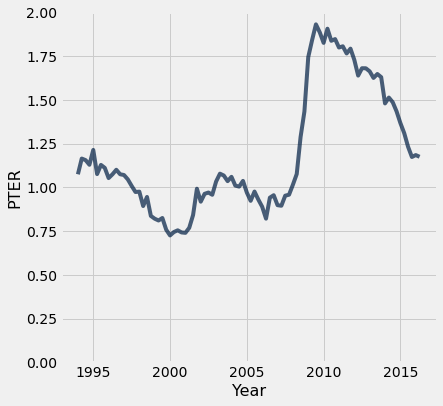

In [16]:
year = 1994 + np.arange(by_pter.num_rows)/4
pter_over_time = unemployment.with_columns(
'Year', year,
'PTER', pter
)
pter_over_time.plot('Year', 'PTER')
plots.ylim(0,2); # Do not change this line

In [17]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 7.** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign `highPTER` to `True` if you think PTER rates were high in this period, or `False` if you think they weren't. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_7
points:
 - 0
 - 4
-->

In [18]:
highPTER = True

In [19]:
grader.check("q1_7")

q1_7 results: All test cases passed!

## 2. Birth Rates

The following table gives Census-based population estimates for each U.S state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from here: http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv. (Note: If it doesn't download for you when you click the link, please copy and paste it into your address bar!)

If you want to read more about the different column descriptions, click [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf)!

The raw data is a bit messy - run the cell below to clean the table and make it easier to work with.

In [20]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period. **(4 Points)**

*Hint:* Which year corresponds to the start of the time period?

<!--
BEGIN QUESTION
name: q2_1
points:
 - 0
 - 4
-->

In [21]:
us_birth_rate = sum(pop.column('BIRTHS')) / sum(pop.column('2015'))
us_birth_rate

0.012358536498646102

In [22]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state. **(4 Points)**

<!--
BEGIN QUESTION
name: q2_2
points:
 - 0
 - 4
-->

In [23]:
migration_rates = pop.column('MIGRATION') / pop.column('2015')
movers = pop.with_columns(
'MIGRATION_RATES', migration_rates
).where('MIGRATION_RATES', are.above(0.01)).num_rows
movers

8

In [24]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 3.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). **(4 Points)**

*Hint:* Make sure you double check the type of the values in the `REGION` column, and appropriately filter (i.e. the types must match!).

<!--
BEGIN QUESTION
name: q2_3
points:
 - 0
 - 4
-->

In [25]:
west_births = sum(pop.where('REGION', are.equal_to(4)).column('BIRTHS'))
west_births

979657

In [26]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 4.** 

In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Line Graph
<br>
2. Bar Chart
<br>
3. Scatter Plot

Assign `visualization` below to the number corresponding to the correct visualization. **(4 Points)**

<!--
BEGIN QUESTION
name: q2_4
points:
 - 0
 - 0
 - 4
-->

In [27]:
visualization = 3

In [28]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 5.** 

In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here. **(4 Points)**

Things to consider:
- What type of chart will help us illustrate an association between 2 variables?
- How can you manipulate a certain table to help generate your chart?


<!--
BEGIN QUESTION
name: q2_5
manual: true
-->

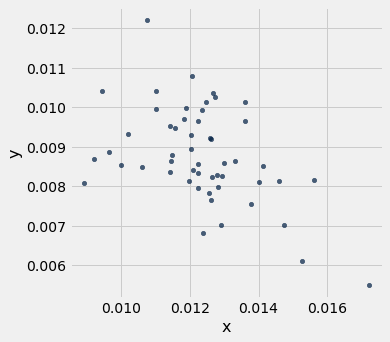

In [29]:
# In this cell, use birth_props and death_props to generate your chart
birth_rates = pop.column('BIRTHS') / pop.column('2015')
death_rates = pop.column('DEATHS') / pop.column('2015')
scatter_plot = Table().with_columns('x', birth_rates,
                                   'y', death_rates)
scatter_plot.scatter('x', 'y')

<!-- END QUESTION -->

**Question 6.** True or False: There is an association between birth rate and death rate during this time interval. 

Assign `assoc` to `True` or `False` in the cell below. **(4 Points)**

<!--
BEGIN QUESTION
name: q2_6
points:
 - 0
 - 4
-->

In [30]:
assoc = False

In [31]:
grader.check("q2_6")

q2_6 results: All test cases passed!

# 3. Uber

Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride, in minutes.

In [47]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


<!-- BEGIN QUESTION -->

**Question 1.** Produce a histogram that visualizes the distributions of all ride times in Boston using the given bins. **(4 Points)**

<!--
BEGIN QUESTION
name: q3_1
manual: true
-->

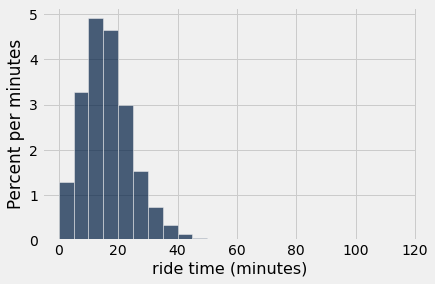

In [48]:
equal_bins = np.arange(0, 120, 5)
boston.hist('ride time', bins = equal_bins, unit = 'minutes')


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.** Now, produce a histogram that visualizes the distribution of all ride times in Manila using the given bins. **(4 Points)**

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->

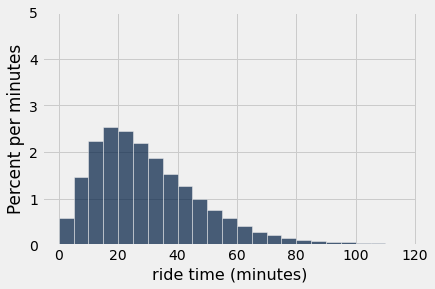

In [50]:
equal_bins = np.arange(0, 120, 5)
manila.hist('ride time', bins = equal_bins, unit = 'minutes')

# Don't delete the following line!
plots.ylim(0, 0.05);

<!-- END QUESTION -->

**Question 3.** Let's take a closer look at the y-axis label. Assign `unit_meaning` to an integer (1, 2, 3) that corresponds to the "unit" in "Percent per unit". **(4 Points)**

1. minutes  
2. ride time  
3. seconds

<!--
BEGIN QUESTION
name: q3_3
points:
 - 0
 - 4
-->

In [51]:
unit_meaning = 1
unit_meaning

1

In [52]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 4.** Assign `boston_under_15` and `manila_under_15` to the percentage of rides that are less than 15 minutes in their respective metropolitan areas. Use the height variables provided below in order to compute the percentages. Your solution should only use height variables, numbers, and mathematical operations. You should **not** access the tables `boston` and `manila` in any way. **(4 Points)**

<!--
BEGIN QUESTION
name: q3_4
manual: false
points:
 - 0
 - 0
 - 2
 - 2
-->

In [54]:
boston_under_5_height = 1.2
manila_under_5_height = 0.6
boston_5_to_under_10_height = 3.2
manila_5_to_under_10_height = 1.4
boston_10_to_under_15_height = 4.9
manila_10_to_under_15_height = 2.2

boston_under_15 = (boston_under_5_height + boston_5_to_under_10_height + boston_10_to_under_15_height) * 5
manila_under_15 = (manila_under_5_height + manila_5_to_under_10_height + manila_10_to_under_15_height) * 5

boston_under_15, manila_under_15

(46.5, 21.0)

In [55]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 5.** Let's take a closer look at the distribution of ride times in Boston. Assign `boston_median_bin` to an integer (1, 2, 3, or 4) that corresponds to the bin that contains the median time. **(4 Points)**

1. 0-8 minutes  
2. 8-14 minutes  
3. 14-20 minutes  
4. 20-40 minutes  

*Hint:* The median of a sorted list has half of the list elements to its left, and half to its right.

<!--
BEGIN QUESTION
name: q3_5
manual: false
points:
 - 0
 - 4
-->

In [58]:
boston_median_bin = 3
boston_median_bin

3

In [59]:
grader.check("q3_5")

q3_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 6.** Identify one difference between the histograms, in terms of actual histogram properties. **(4 Points)**

<!--
BEGIN QUESTION
name: q3_6
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 7.** Why is your solution in Question 6 the case? Based on the following two readings, why are the distributions for Boston and Manila different? **(4 Points)**

- [Boston reading](https://www.climatestotravel.com/climate/united-states/boston)
- [Manila reading](https://newsinfo.inquirer.net/1383983/metro-manila-traffic-2nd-worst-in-the-world-report)

*Hint:* Try thinking about external factors of the two cities that may be causing the difference!

<!--
BEGIN QUESTION
name: q3_7
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



## 4. Histograms

Consider the following scatter plot: 

![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given three histograms -- one corresponds to column `x`, one corresponds to column `y`, and one does not correspond to either column. 

**Histogram A:** ![](var3.png)
**Histogram B:** ![](var1.png)
**Histogram C:** ![](var2.png)

**Question 1.** Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to either 1, 2, or 3. **(5 Points)**

1. Histogram A
2. Histogram B
3. Histogram C

<!--
BEGIN QUESTION
name: q4_1
manual: false
points:
 - 0
 - 1
 - 4
-->

In [41]:
histogram_column_x = ...

In [42]:
grader.check("q4_1")

q4_1 results:
    q4_1 - 1 result:
        Trying:
            type(histogram_column_x) == int
        Expecting:
            True
        **********************************************************************
        Line 2, in q4_1 0
        Failed example:
            type(histogram_column_x) == int
        Expected:
            True
        Got:
            False

    q4_1 - 2 result:
        Trying:
            histogram_column_x == 1 or histogram_column_x == 2 or histogram_column_x == 3
        Expecting:
            True
        **********************************************************************
        Line 1, in q4_1 1
        Failed example:
            histogram_column_x == 1 or histogram_column_x == 2 or histogram_column_x == 3
        Expected:
            True
        Got:
            False

<!-- BEGIN QUESTION -->

**Question 2.** State at least one reason why you chose the histogram from Question 1. **Make sure to indicate which histogram you selected** (ex: "I chose histogram A because ..."). **(5 Points)**

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 3.** Suppose we run `t.hist('y')`. Which histogram does this code produce? Assign `histogram_column_y` to either 1, 2, or 3. **(5 Points)**

1. Histogram A
2. Histogram B
3. Histogram C

<!--
BEGIN QUESTION
name: q4_3
manual: false
points:
 - 0
 - 1
 - 4
-->

In [43]:
histogram_column_y = ...

In [44]:
grader.check("q4_3")

q4_3 results:
    q4_3 - 1 result:
        Trying:
            type(histogram_column_y) == int
        Expecting:
            True
        **********************************************************************
        Line 2, in q4_3 0
        Failed example:
            type(histogram_column_y) == int
        Expected:
            True
        Got:
            False

    q4_3 - 2 result:
        Trying:
            histogram_column_y == 1 or histogram_column_y == 2 or histogram_column_y == 3
        Expecting:
            True
        **********************************************************************
        Line 1, in q4_3 1
        Failed example:
            histogram_column_y == 1 or histogram_column_y == 2 or histogram_column_y == 3
        Expected:
            True
        Got:
            False

<!-- BEGIN QUESTION -->

**Question 4.** State at least one reason why you chose the histogram from Question 3.  **Make sure to indicate which histogram you selected** (ex: "I chose histogram A because ..."). **(5 Points)**

<!--
BEGIN QUESTION
name: q4_4
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



You're done with Homework 3!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save and Checkpoint** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Go to [Gradescope](https://www.gradescope.com/courses/288788) and submit the zip file to the corresponding assignment. The name of this assignment is "Homework 3 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [45]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_6 results: All test cases passed!

q3_3 results:
    q3_3 - 1 result:
        Trying:
            1 <= unit_meaning <= 3
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_3 0
        Failed example:
            1 <= unit_meaning <= 3
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q3_3 0[0]>", 

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [46]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, force_save=True)

<IPython.core.display.Javascript object>